<a href="https://colab.research.google.com/github/WilmeGR/ml-arbol-decisiones/blob/main/Modelo_Arbol_de_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


# **Verificacion de datos**

In [276]:
#Leer y mostrar csv
df = pd.read_csv('drive/MyDrive/curso/car_evaluation.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [277]:
#Evaluar el  shape
df.shape

(1728, 7)

In [278]:
#Renombrar columnas
col_names = ['compra','mantenimiento','puertas','personas','maletero','seguridad','clase']
df.columns = col_names
df.head()

,compra,mantenimiento,puertas,personas,maletero,seguridad,clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [279]:
#Vizualizacion de tipos de datos
df.dtypes

compra           object
mantenimiento    object
puertas          object
personas         object
maletero         object
seguridad        object
clase            object
dtype: object

In [280]:
#Verificar cantidad en cada calse
df['clase'].value_counts()

clase
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [281]:
#Verificar nulos
df.isna().sum()

compra           0
mantenimiento    0
puertas          0
personas         0
maletero         0
seguridad        0
clase            0
dtype: int64

In [282]:
#Codificacion de datos
le = LabelEncoder()
df[col_names] = df[col_names].apply(le.fit_transform)
df

,compra,mantenimiento,puertas,personas,maletero,seguridad,clase
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


## **Procesamiento de datos**

In [283]:
#Separacion de X e Y para entrenamiento de modelo
X = df.drop(['clase'],axis =1)
y = df['clase']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: clase, dtype: int64

In [284]:
#Dividir en regla 30% test y 70% train
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state= 42)

In [285]:
#Verificacion de division de datos en X
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [286]:
#Verificacion de division de datos en y
y_train.shape, y_test.shape

((1209,), (519,))

In [287]:
X_train.head()

,compra,mantenimiento,puertas,personas,maletero,seguridad
1178,2,2,3,1,0,0
585,0,0,1,2,2,1
1552,1,2,1,1,1,2
1169,2,2,3,0,0,0
1033,2,0,2,0,0,2


In [288]:
X_train.dtypes

compra           int64
mantenimiento    int64
puertas          int64
personas         int64
maletero         int64
seguridad        int64
dtype: object

# **Entrenamiento del modelo de clasificacion**

In [289]:
#instanciar el modelo y realizar el fit de train
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [290]:
y_pred_test = tree_model.predict(X_test)

In [291]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Exactitud del modelo en test: {accuracy_test:.2f}%")

Exactitud del modelo en test: 0.97%


In [292]:
new_entrada = [[3, 3, 0, 0, 2, 1]]

prediction = tree_model.predict(new_entrada)

# Ahora 'prediction' contendrá la predicción del modelo para la nueva instancia
print("Posible clase:", prediction)


Posible clase: [2]


In [295]:
def predecir_compra_automovil(nueva_entrada, label_encoders, modelo_arbol):
    # Transformar la nueva entrada usando el labelencoder
    nueva_entrada_le = [label_encoders[i].transform([val])[0] for i, val in enumerate(nueva_entrada)]

    # Predecir con el modelo
    prediccion = modelo_arbol.predict([nueva_entrada_le])
    clase = le.inverse_transform(prediccion.ravel())

    # evaluacion de resultados
    if clase[0] == 'unacc':
        print('Esta compra no es aceptable')
    elif clase[0] == 'acc':
        print('Esta compra es un poco aceptable')
    elif clase[0] == 'good':
        print('Esta compra es buena')
    else:
        print('Esta compra es muy buena')

In [296]:
nueva_entrada = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
predecir_compra_automovil(nueva_entrada, label_encoders, tree_model)

Esta compra no es aceptable


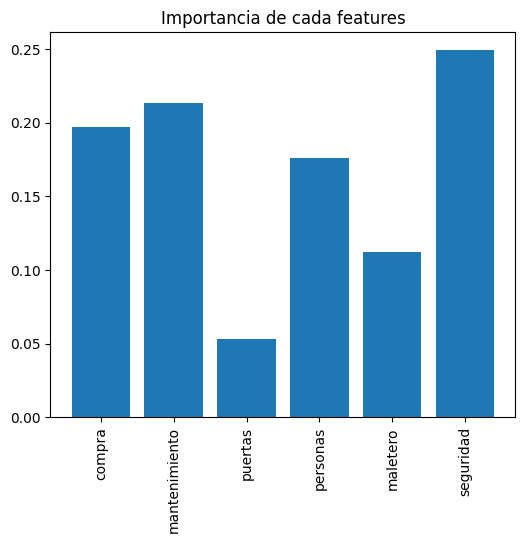

In [294]:
#Verificacion de feature importances
importances = tree_model.feature_importances_
columns = X.columns
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlabel=('Features')
ax.bar(columns,importances,width=0.8)
ax.set_title ('Importancia de cada features')
plt.xticks(rotation=90)
plt.show()